In [1]:
import numpy as np
import uproot
import matplotlib.pyplot as plt

In [2]:
myFile = uproot.open('TestFiles.root')

In [3]:
tree = myFile['TestTree']

In [4]:
eventId = tree.array('eventId')
pfoId = tree.array('pfoId')
driftPos = tree.array('hitDriftPositionsW')
wirePos = tree.array('hitWirePositionsW')
pdg = tree.array('bestMCParticlePdgCode')
isTrack = tree.array('bestMCParticleIsTrack')
completeness = tree.array('completeness')
purity = tree.array('purity')
nHitsW = tree.array('nHitsInPfoW')
nHitsU = tree.array('nHitsInPfoU')
nHitsV = tree.array('nHitsInPfoV')
vertexdriftPos = tree.array('vertexDriftPosition')
vertexwirePos = tree.array('vertexWirePositionW')

# Calculate means

In [5]:
drift_pos_av = driftPos.mean()
wire_pos_av = wirePos.mean()

# Calculate gradient

In [6]:
drift_comp = driftPos - drift_pos_av
wire_comp = wirePos - wire_pos_av
drift_comp_sq = drift_comp ** 2
numerator = (drift_comp * wire_comp).sum()
denominator = (drift_comp_sq).sum()
m = numerator / denominator
c = wire_pos_av - m * drift_pos_av

C:\Users\r.xavier\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  


# Cuts on purity and completeness

In [7]:
pfo_hits = np.array([ len(x) for x in wirePos])

track_pfos = np.where((completeness > 0.9) & (purity > 0.89) & (pfo_hits > 5) & (isTrack == 1))

shower_pfos = np.where((completeness > 0.9) & (purity > 0.89) & (pfo_hits > 5) & (isTrack == 0))

select_wirePos_tracks = wirePos[track_pfos]

select_driftPos_tracks = driftPos[track_pfos]

select_wirePos_showers = wirePos[shower_pfos]

select_driftPos_showers = driftPos[shower_pfos]

vertexdriftPos_tracks = vertexdriftPos[track_pfos]

vertexwirePos_tracks = vertexwirePos[track_pfos]

vertexdriftPos_showers = vertexdriftPos[shower_pfos]

vertexwirePos_showers = vertexwirePos[shower_pfos]

m_tracks = m[track_pfos]

c_tracks = c[track_pfos]

m_showers = m[shower_pfos]

c_showers = c[shower_pfos]

# Plot tracks

In [8]:
y_values_tracks = []
m_values_tracks = []
c_values_tracks = []

for i in range(len(track_pfos[0])):
        
        y = m_tracks[i]*select_driftPos_tracks[i] + c_tracks[i]
#         fig = plt.figure(figsize = (10, 15))
#         plt.scatter(select_driftPos_tracks[i], select_wirePos_tracks[i], color = 'b', s = 1)
#         plt.plot(select_driftPos_tracks[i], y, color = 'r', linewidth = 3) 
#         plt.scatter(x_origin_tracks[i], y_origin_tracks[i], color = 'g', s = 150)
#         plt.scatter(select_driftPos_tracks[1][100], select_wirePos_tracks[1][100], color = 'g', s = 150, marker = 'x')

        y_values_tracks.append(y)

        m_values_tracks.append(m_tracks[i])

        c_values_tracks.append(c_tracks[i])

# Plot showers

In [9]:
y_values_showers = []
m_values_showers = []
c_values_showers = []

for i in range(len(shower_pfos[0])):
        
        y = m_showers[i]*select_driftPos_showers[i] + c_showers[i]
#         fig = plt.figure(figsize = (10, 15))
#         plt.scatter(select_driftPos_showers[i], select_wirePos_showers[i], color = 'b', s = 1)
#         plt.plot(select_driftPos_showers[i], y, color = 'r', linewidth = 3) 
#         plt.scatter(x_origin_showers[i], y_origin_showers[i], color = 'g', s = 150)
#         plt.scatter(vertexdriftPos_showers[i], vertexwirePos_showers[i], color = 'g', s = 150, marker = 'x')

        y_values_showers.append(y)

        m_values_showers.append(m_showers[i])

        c_values_showers.append(c_showers[i])

# Tracks: Get first x and y values for each PFO regression line

In [10]:
first_y_tracks = []
first_x_tracks = []
last_x_tracks = []
last_y_tracks = []

for i in range(len(track_pfos[0])):
    
    origin_x = select_driftPos_tracks[i][0]
    
    origin_y = (m_values_tracks[i] * select_driftPos_tracks[i][0]) + c_values_tracks[i]
    
    end_x = select_driftPos_tracks[i][-1]
    
    end_y = (m_values_tracks[i] * select_driftPos_tracks[i][-1]) + c_values_tracks[i]
    
    first_y_tracks.append(origin_y)
    
    first_x_tracks.append(origin_x)
    
    last_y_tracks.append(end_y)
    
    last_x_tracks.append(end_x)

# Tracks: Regression line vector

In [11]:
d_zero_tracks = ((vertexwirePos_tracks - first_y_tracks) ** 2) + ((vertexdriftPos_tracks - first_x_tracks) ** 2)
d_end_tracks = ((vertexwirePos_tracks - last_y_tracks) ** 2) + ((vertexdriftPos_tracks - last_x_tracks) ** 2)

In [12]:
x_sinc_tracks = []
y_sinc_tracks = []

x_origin_tracks = []
y_origin_tracks = []

for i in range(len(track_pfos[0])):
    
    x_origin, y_origin = (first_x_tracks[i], first_y_tracks[i]) if d_zero_tracks[i] < d_end_tracks[i] else (last_x_tracks[i], last_y_tracks[i])
    
    x_origin_tracks.append(x_origin)
    
    y_origin_tracks.append(y_origin)
    
    x_sinc, y_sinc = (first_x_tracks[i], first_y_tracks[i]) if d_zero_tracks[i] >= d_end_tracks[i] else (last_x_tracks[i], last_y_tracks[i])
    
    x_sinc_tracks.append(x_sinc)
    
    y_sinc_tracks.append(y_sinc)

In [13]:
x_line_vector_tracks = np.array(x_sinc_tracks) - np.array(x_origin_tracks)
y_line_vector_tracks = np.array(y_sinc_tracks) - np.array(y_origin_tracks)

In [14]:
mag_line_tracks = np.sqrt((x_line_vector_tracks ** 2) + (y_line_vector_tracks ** 2))

# Tracks: Hits vector

In [15]:
x_hit_vector_tracks = select_driftPos_tracks - x_origin_tracks
y_hit_vector_tracks = select_wirePos_tracks - y_origin_tracks

In [16]:
mag_hit_tracks = np.sqrt((x_hit_vector_tracks ** 2) + (y_hit_vector_tracks ** 2))

# Tracks: Calculate angle

In [17]:
theta_num_tracks = (x_line_vector_tracks * x_hit_vector_tracks) + (y_line_vector_tracks * y_hit_vector_tracks)
theta_denom_tracks = mag_line_tracks * mag_hit_tracks
theta_tracks = theta_num_tracks / theta_denom_tracks

C:\Users\r.xavier\Anaconda3\lib\site-packages\awkward\array\jagged.py:1043: RuntimeWarning: invalid value encountered in true_divide
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [18]:
angle_tracks = np.degrees(np.arccos(theta_tracks))
av_theta_tracks = (angle_tracks.mean())

C:\Users\r.xavier\Anaconda3\lib\site-packages\awkward\array\jagged.py:1043: RuntimeWarning: invalid value encountered in arccos
  result = getattr(ufunc, method)(*inputs, **kwargs)


# Showers: Get first x and y values for each PFO regression line


In [19]:
first_y_showers = []
first_x_showers = []
last_x_showers = []
last_y_showers = []

for i in range(len(shower_pfos[0])):
    
    origin_x = select_driftPos_showers[i][0]
    
    origin_y = (m_values_showers[i] * select_driftPos_showers[i][0]) + c_values_showers[i]
    
    end_x = select_driftPos_showers[i][-1]
    
    end_y = (m_values_showers[i] * select_driftPos_showers[i][-1]) + c_values_showers[i]
    
    first_y_showers.append(origin_y)
    
    first_x_showers.append(origin_x)
    
    last_y_showers.append(end_y)
    
    last_x_showers.append(end_x)

# Showers: Regression line vector

In [20]:
d_zero_showers = ((vertexwirePos_showers - first_y_showers) ** 2) + ((vertexdriftPos_showers - first_x_showers) ** 2)
d_end_showers = ((vertexwirePos_showers - last_y_showers) ** 2) + ((vertexdriftPos_showers - last_x_showers) ** 2)

In [21]:
x_sinc_showers = []
y_sinc_showers = []

x_origin_showers = []
y_origin_showers = []

for i in range(len(shower_pfos[0])):
    
    x_origin, y_origin = (first_x_showers[i], first_y_showers[i]) if d_zero_showers[i] < d_end_showers[i] else (last_x_showers[i], last_y_showers[i])
    
    x_origin_showers.append(x_origin)
    
    y_origin_showers.append(y_origin)
    
    x_sinc, y_sinc = (first_x_showers[i], first_y_showers[i]) if d_zero_showers[i] >= d_end_showers[i] else (last_x_showers[i], last_y_showers[i])
    
    x_sinc_showers.append(x_sinc)
    
    y_sinc_showers.append(y_sinc)
    

In [22]:
x_line_vector_showers = np.array(x_sinc_showers) - np.array(x_origin_showers)
y_line_vector_showers = np.array(y_sinc_showers) - np.array(y_origin_showers)

In [23]:
mag_line_showers = np.sqrt((x_line_vector_showers ** 2) + ((y_line_vector_showers) ** 2))

# Showers: Hits vector

In [24]:
x_hit_vector_showers =  select_driftPos_showers - x_origin_showers 
y_hit_vector_showers = select_wirePos_showers - y_origin_showers

In [25]:
mag_hit_showers = np.sqrt((x_hit_vector_showers ** 2) + ((y_hit_vector_showers) ** 2))

# Showers: Calculate angle

In [26]:
theta_num_showers = (x_line_vector_showers * x_hit_vector_showers) + (y_line_vector_showers * y_hit_vector_showers)
theta_denom_showers = mag_line_showers * mag_hit_showers
theta_showers = theta_num_showers / theta_denom_showers

In [27]:
angle_showers = np.degrees(np.arccos(theta_showers))
av_theta_showers = (angle_showers.mean())

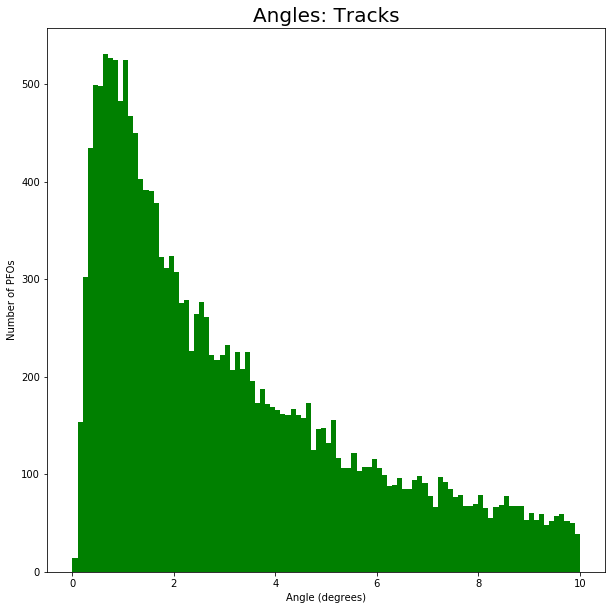

In [28]:
fig = plt.figure(1, figsize=(10, 10))
plt.hist(av_theta_tracks, 100, (0, 10), color = 'g')
plt.title('Angles: Tracks', fontsize = 20)
plt.xlabel('Angle (degrees)')
plt.ylabel('Number of PFOs')

plt.show()

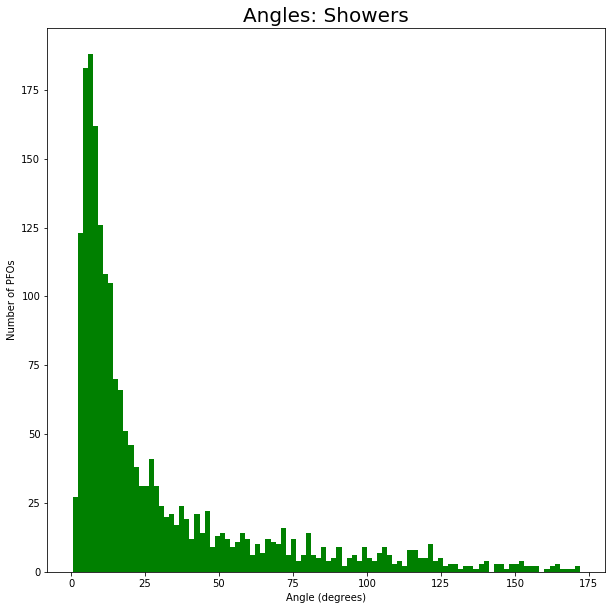

In [29]:
fig = plt.figure(1, figsize=(10, 10))
plt.hist(av_theta_showers, 100, color = 'g')
plt.title('Angles: Showers', fontsize = 20)
plt.xlabel('Angle (degrees)')
plt.ylabel('Number of PFOs')

plt.show()

In [54]:
weight_tracks = np.ones_like(av_theta_tracks) / len(av_theta_tracks)
weight_showers = np.ones_like(av_theta_showers) / len(av_theta_showers)

In [438]:
av_theta_showers.max()

171.98999687916535

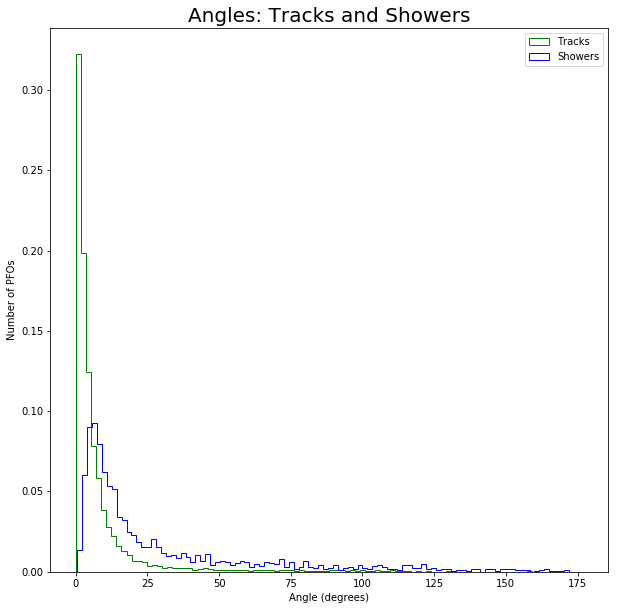

In [473]:
fig = plt.figure(1, figsize=(10, 10))
plt.hist(av_theta_tracks, 100, weights = weight_tracks, color = 'g', histtype = u'step', label = 'Tracks')
plt.hist(av_theta_showers, 100, weights = weight_showers, color = 'b', histtype = u'step', label = 'Showers')
plt.title('Angles: Tracks and Showers', fontsize = 20)
plt.xlabel('Angle (degrees)')
plt.ylabel('Number of PFOs')

plt.legend()
        
plt.show()

# Assessing perfomance 

In [462]:
bin_angle_values = np.arange(0.0075, 172, 0.2)

In [463]:
range(len(bin_angle_values))

range(0, 860)

In [464]:
np.sort(av_theta_tracks)[0]

0.007496917213860834

In [465]:
trueTracksCalledTracks = []

for i in range(len(bin_angle_values)):
    trueTracksCalledTracks.append(np.where(av_theta_tracks <= bin_angle_values[i])[0])

In [466]:
len(trueShowersAsTracks)

500

In [467]:
trueTracksCalledShowers = []

for i in range(len(bin_angle_values)):
    trueTracksCalledShowers.append(np.where(av_theta_tracks > bin_angle_values[i])[0])

In [468]:
trueShowersCalledTracks = []

for i in range(len(bin_angle_values)):
     trueShowersCalledTracks.append(np.where(av_theta_showers <= bin_angle_values[i])[0])

In [469]:
trueShowersCalledShowers = []

for i in range(len(bin_angle_values)):
    trueShowersCalledShowers.append(np.where(av_theta_showers > bin_angle_values[i])[0])

In [470]:
completeness = []

for i in range(len(bin_angle_values)):
    completeness_num = len(trueTracksCalledTracks[i])
    completeness_denom = len(trueTracksCalledTracks[i]) + len(trueTracksCalledShowers[i])
    completeness.append(completeness_num / completeness_denom)

In [471]:
purity = []

for i in range(len(bin_angle_values)):
    purity_num = len(trueTracksCalledTracks[i])
    purity_denom = len(trueTracksCalledTracks[i]) + len(trueShowersCalledTracks[i])
    purity.append(purity_num / purity_denom)

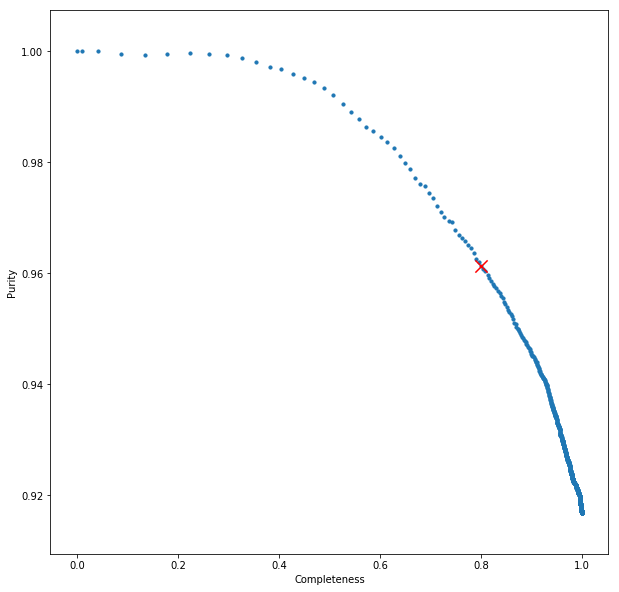

In [472]:
fig = plt.figure(figsize = (10, 10))
plt.xlabel('Completeness', fontsize = 10)
plt.ylabel('Purity', fontsize = 10)
plt.scatter(completeness, purity, s = 10)

#plt.scatter(completeness[8], purity[8], color = 'r', s = 150, marker = 'x')
plt.scatter(completeness[48], purity[48], color = 'r', s = 150, marker = 'x')

In [ ]:
bin_angle_values[48]

In [474]:
purity[48]

0.9612910143684323

In [475]:
completeness[48]

0.8003035172290662

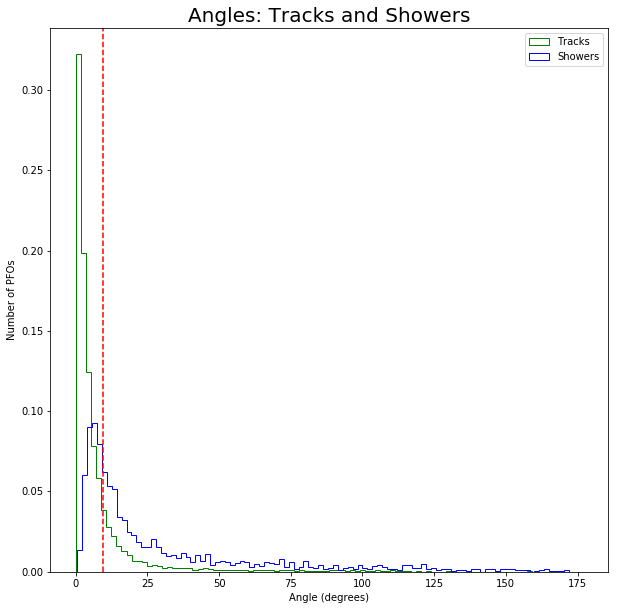

In [476]:
fig = plt.figure(1, figsize=(10, 10))
plt.hist(av_theta_tracks, 100, weights = weight_tracks, color = 'g', histtype = u'step', label = 'Tracks')
plt.hist(av_theta_showers, 100, weights = weight_showers, color = 'b', histtype = u'step', label = 'Showers')
plt.title('Angles: Tracks and Showers', fontsize = 20)
plt.xlabel('Angle (degrees)')
plt.ylabel('Number of PFOs')
plt.axvline(x=9.607500000000002, linestyle = 'dashed', color = 'r')

plt.legend()
        
plt.show()